In [16]:
import pandas as pd
 
df = pd.read_csv('Data/ham-spam.csv')
df.head()

,IsSpam,Text
0,0,key issues going forwarda year end reviews rep...
1,0,congrats contratulations the execution the cen...
2,0,key issues going forwardall under control set...
3,0,epmi files protest entergy transcoattached our...
4,0,california power please contact kristin walsh ...


In [17]:
df.groupby('IsSpam').describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        500    499   paso firm capacity award memorandumlouise del...    2
1        500    500  unfeigned alilum ciall ambiien aagrra xaanax c...    1

In [18]:
df = df.drop_duplicates()
df.groupby('IsSpam').describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        499    499  reminder vacationlouise would like remind you ...    1
1        500    500  unfeigned alilum ciall ambiien aagrra xaanax c...    1

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
 
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
x = vectorizer.fit_transform(df['Text'])
y = df['IsSpam']

In [20]:
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=0)

In [21]:
from sklearn.naive_bayes import MultinomialNB
 
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

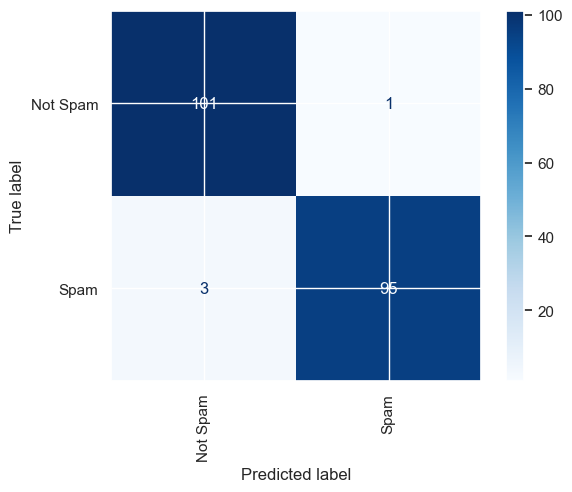

In [22]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(model, x_test, y_test,
                   display_labels=['Not Spam', 'Spam'],
                   cmap='Blues', xticks_rotation='vertical')

In [23]:
model.score(x_test, y_test)

0.98

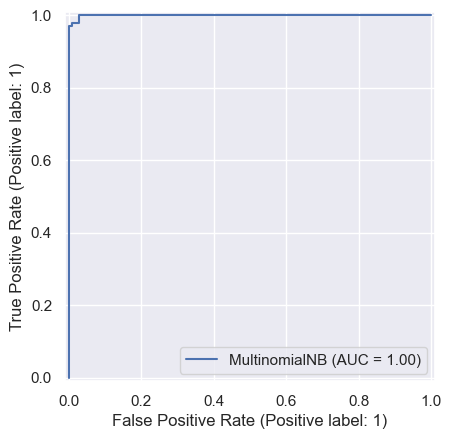

In [24]:
from sklearn.metrics import RocCurveDisplay as rcd
import seaborn as sns
sns.set()

rcd.from_estimator(model, x_test, y_test)

In [25]:
msg = 'Can you attend a code review on Tuesday to make sure the logic is solid?'
input = vectorizer.transform([msg])
model.predict(input)[0]

np.int64(0)

In [26]:
model.predict_proba(input)[0][0]

np.float64(0.9999497111473539)

In [27]:
msg = 'Why pay more for expensive meds when you can order them online '\
      'and save $$$?'

input = vectorizer.transform([msg])
model.predict(input)[0]

np.int64(1)

In [28]:
model.predict_proba(input)[0][0]

np.float64(0.00021423891260677753)